<a href="https://colab.research.google.com/github/rshaikh95/datasci_4_web_viz/blob/main/cdc_CO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Fetch the data
url = "https://raw.githubusercontent.com/rshaikh95/datasci_4_web_viz/main/datasets/PLACES__Local_Data_for_Better_Health__County_Data_2023_release.csv"
df = pd.read_csv(url)
df.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'LocationName', 'DataSource',
       'Category', 'Measure', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopulation',
       'LocationID', 'CategoryID', 'MeasureId', 'DataValueTypeID',
       'Short_Question_Text', 'Geolocation', 'Counties'],
      dtype='object')

In [ ]:
# Filter for 'BINGE' as measureid and 'Age-adjusted prevalence' as data_value_type
df = df[(df['MeasureId'] == 'BPHIGH') & (df['Data_Value_Type'] == 'Age-adjusted prevalence')]
df

In [9]:
# Group by 'LocationName' and get the average (or sum) 'Data_Value'
grouped = df.groupby('LocationName').Data_Value.mean().sort_values(ascending=False)
grouped

LocationName
Crowley        31.9
Bent           31.4
Logan          28.6
Costilla       28.2
Baca           28.0
               ... 
Teller         22.7
Routt          22.5
Clear Creek    22.3
Summit         22.2
Pitkin         21.3
Name: Data_Value, Length: 64, dtype: float64

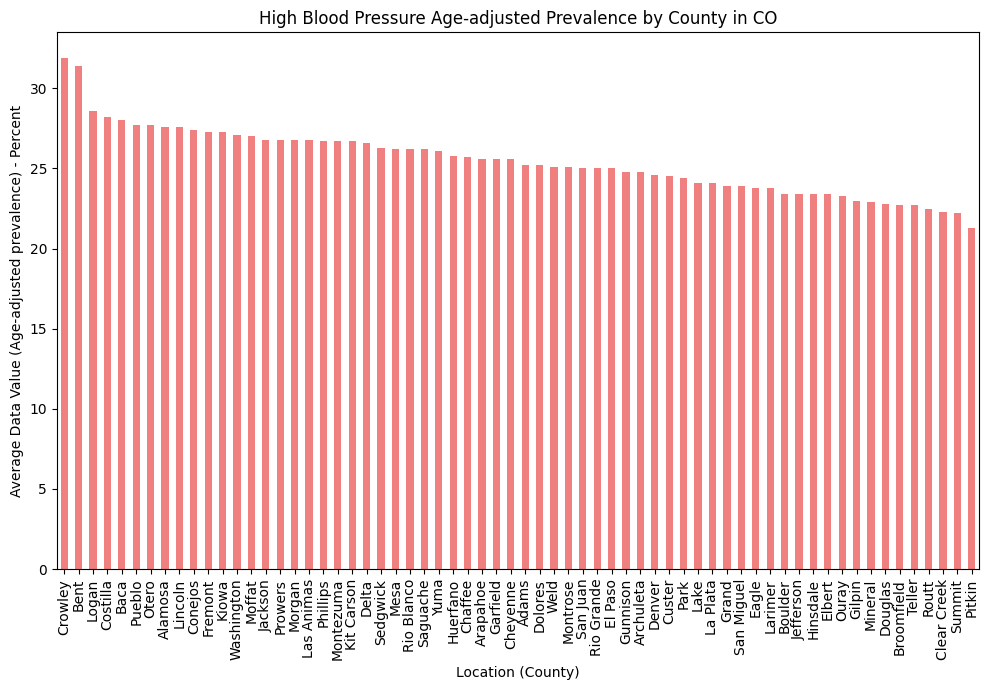

In [12]:
# Plotting
plt.figure(figsize=(10, 7))
grouped.plot(kind='bar', color='lightcoral')
plt.ylabel('Average Data Value (Age-adjusted prevalence) - Percent')
plt.xlabel('Location (County)')
plt.title('High Blood Pressure Age-adjusted Prevalence by County in CO')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("high_bp_per_location.png")  # Saving the plot as an image
plt.show()

In [14]:
import ipywidgets as widgets

# Compute the average data value across all counties
avg_data_value = df['Data_Value'].mean()

# Sort the counties in ascending order for the dropdown list
sorted_counties = sorted(df['LocationName'].unique())

# Interactive selection of county for visualization using ipywidgets
@widgets.interact(County=sorted_counties)
def plot_data(County):
    county_value = df[df['LocationName'] == County]['Data_Value'].values[0]

    # Labels for bars
    labels = [County, 'Average across all counties']

    # Data values for bars
    values = [county_value, avg_data_value]

    plt.figure(figsize=(8, 6))

    # Plot the bars
    colors = ['lightcoral', 'lightblue']
    plt.bar(labels, values, color=colors)

    plt.ylabel('Data Value (Age-adjusted prevalence) - Percent')
    plt.title(f'High BP Age-adjusted Prevalence in {County} vs Average across all counties')

    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='County', options=('Adams', 'Alamosa', 'Arapahoe', 'Archuleta', 'Ba…